In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
import scipy.stats as ss

In [13]:
df = pd.read_csv(r"C:\Users\LENOVO\autos_clean.csv")

In [14]:
df.head()

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,2016-03-14,112,2016-04-05 12:47:46
1,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,2016-03-17,-62,2016-03-17 17:40:17
2,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,2016-03-31,21,2016-04-06 10:17:21
3,5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,2016-04-04,-17,2016-04-06 19:17:07
4,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,2016-04-01,40,2016-04-05 18:18:39


In [15]:
df.drop("Unnamed: 0",axis = 1,inplace = True)

In [16]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,2016-03-14,112,2016-04-05 12:47:46
1,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,2016-03-17,-62,2016-03-17 17:40:17
2,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,2016-03-31,21,2016-04-06 10:17:21
3,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,2016-04-04,-17,2016-04-06 19:17:07
4,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,2016-04-01,40,2016-04-05 18:18:39


## Analysis 3

### 1. The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

In [17]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])
df['kilometer'] = df['kilometer'].astype('int32')
df['yearOfRegistration'] = df['yearOfRegistration'].astype('int16')
df['powerPS'] = df['powerPS'].astype('int32')
df['monthOfRegistration'] = df['monthOfRegistration'].astype('int8')
df['postalCode'] = df['postalCode'].astype('int8')

In [ ]:
df.drop_duplicates(inplace = True)
df = df.drop(['notRepairedDamage','nrOfPictures'],axis = 1)
df.dropna(subset = ['model'],inplace = True)
yr = df[(df['yearOfRegistration'] < 1900) | (df['yearOfRegistration'] >2023)]
df.drop(yr.index, inplace = True)
df.drop(df[(df['price']==0) | (df['price']>4000000) | (df['price']< 500)].index, inplace = True)

In [8]:
memory = df.memory_usage().sum()
memory_in_MB = memory/(1024**2)
memory_in_MB

37.83174514770508

### 2.What is the Average price of vehicle by fuel type and gearbox type.Give a plot¶

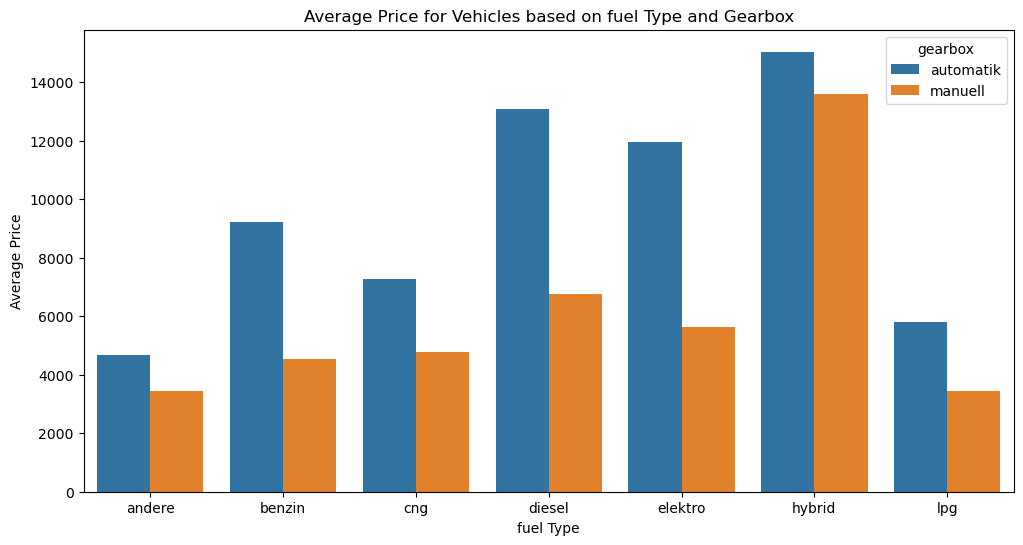

In [9]:
avg_price = df.groupby(['fuelType','gearbox'])['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x ='fuelType', y ='price', hue='gearbox', data = avg_price)
plt.title('Average Price for Vehicles based on fuel Type and Gearbox')
plt.xlabel('fuel Type')
plt.ylabel('Average Price')
plt.show()

### 3. What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

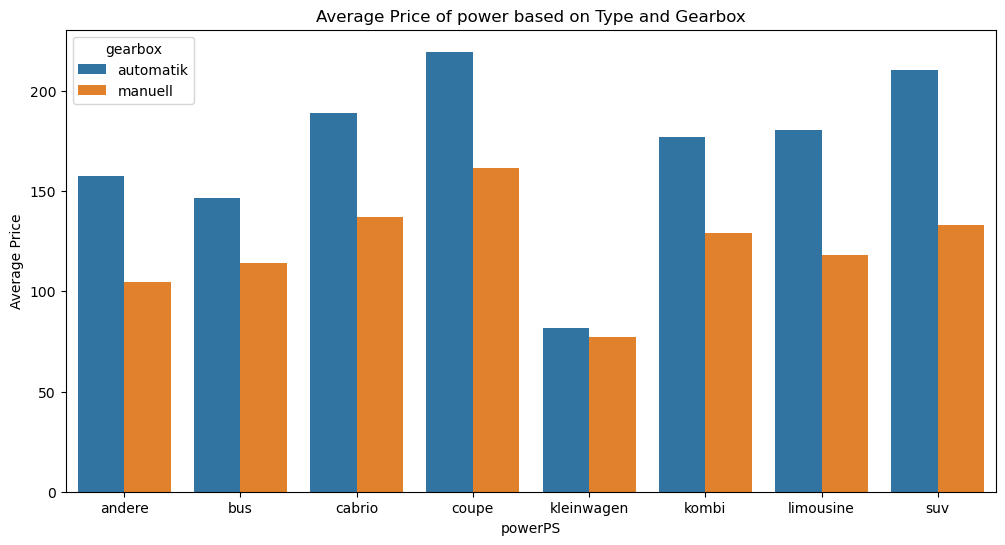

In [10]:
avg_price = df.groupby(['vehicleType','gearbox'])['powerPS'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x = 'vehicleType', y='powerPS', hue='gearbox', data = avg_price)
plt.title('Average Price of power based on Type and Gearbox')
plt.xlabel('powerPS')
plt.ylabel('Average Price')
plt.show()

## 4 What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

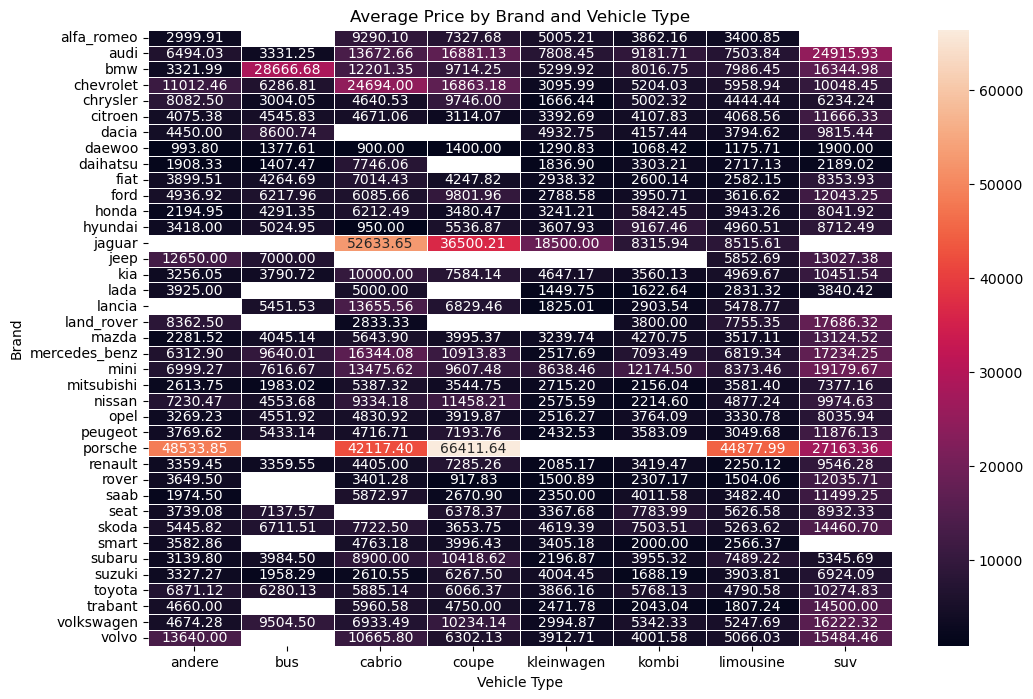

In [11]:
heatmap = df.groupby(['brand', 'vehicleType'])['price'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap, annot=True, fmt=".2f", linewidths=.5)
plt.xlabel('Vehicle Type')
plt.ylabel('Brand')
plt.title('Average Price by Brand and Vehicle Type')
plt.show()